In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

%matplotlib inline

In [67]:
df = pd.read_csv('data/forest_fire_regression.csv')

In [68]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [69]:
# Separating features and target variable
X = df.drop('FWI', axis=1)
y = df['FWI']

In [70]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [71]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((182, 11), (61, 11), (182,), (61,))

In [72]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


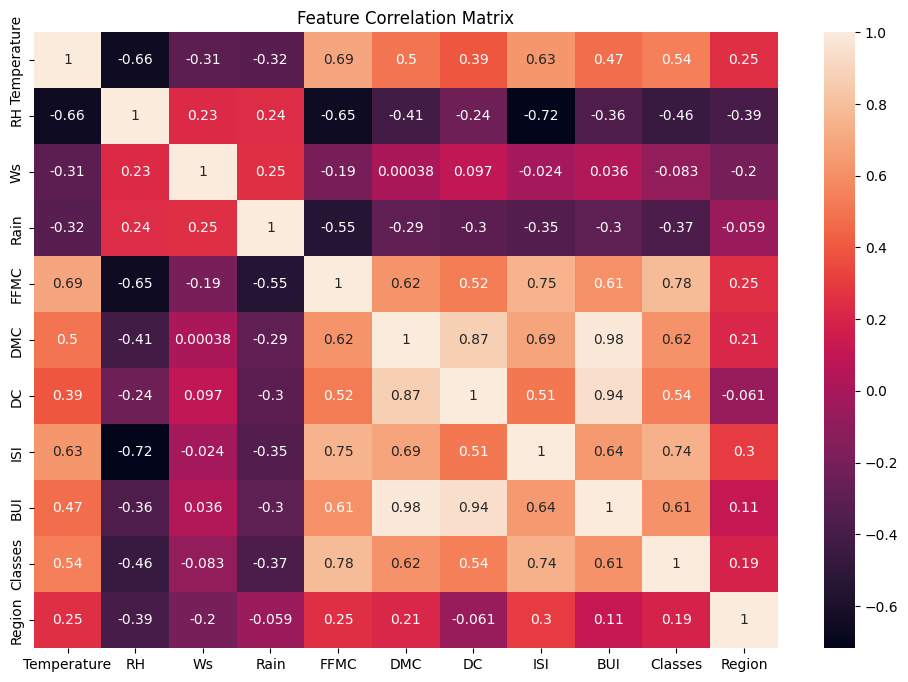

In [73]:
# Visualizing the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(X_train.corr(), annot=True,)
plt.title('Feature Correlation Matrix')
plt.show()

In [74]:
def correlation(data, threshold):
    col_corr = set()  # Set of all the names of deleted columns
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [75]:
correleted_features = correlation(X_train, 0.85)

In [76]:
## drop highly correlated features
X_train.drop(correlation(X_train, 0.85), axis=1, inplace=True)
X_test.drop(correlation(X_test, 0.85), axis=1, inplace=True)

In [77]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((182, 9), (61, 9), (182,), (61,))

In [78]:
X_test.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
24,31,64,15,0.0,86.7,14.2,5.7,1,0
6,33,54,13,0.0,88.2,9.9,6.4,1,0
152,28,58,18,2.2,63.7,3.2,1.2,0,1
232,34,58,13,0.2,79.5,18.7,2.1,0,1
238,30,65,14,0.0,85.4,16.0,4.5,1,1


### Feature scaling or standardization

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [80]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [81]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 9))

## Box plots to visualize the effect of scaling

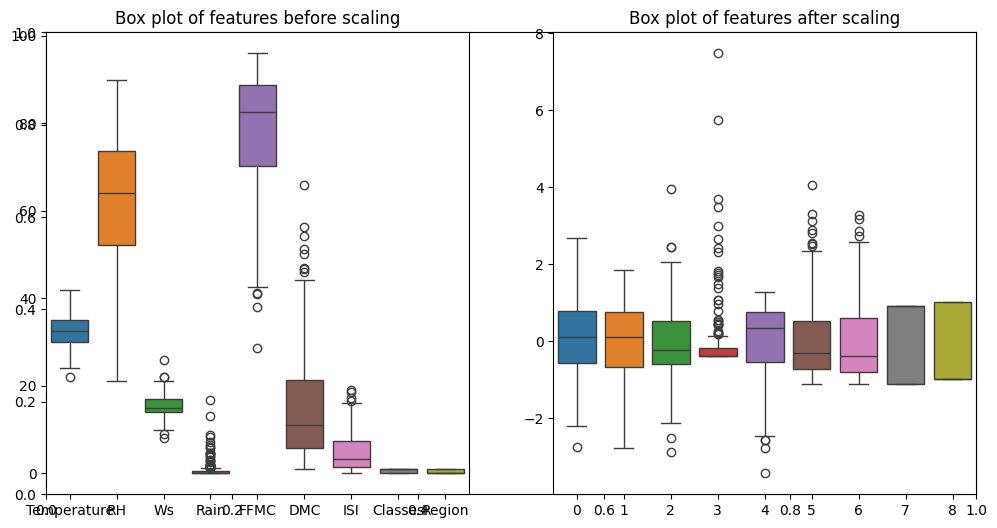

In [82]:
plt.subplots(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('Box plot of features before scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('Box plot of features after scaling')
plt.show()

## Linear Regression

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred = lr_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Linear Regression Model\nMean Squared Error: {mse}\nR^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')


Linear Regression Model
Mean Squared Error: 0.67427668737916
R^2 Score: 0.9847657384266951
Mean Absolute Error: 0.5468236465249987


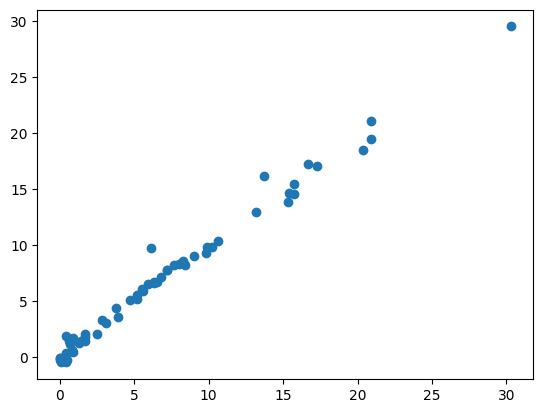

In [84]:
plt.scatter(y_test, y_pred)

### Apply Lasso Regression

In [85]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()

In [86]:
lasso_model.fit(X_train_scaled, y_train)
y_pred = lasso_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Linear Regression Model\nMean Squared Error: {mse}\nR^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')

Linear Regression Model
Mean Squared Error: 2.2483458918974764
R^2 Score: 0.9492020263112388
Mean Absolute Error: 1.133175994914409


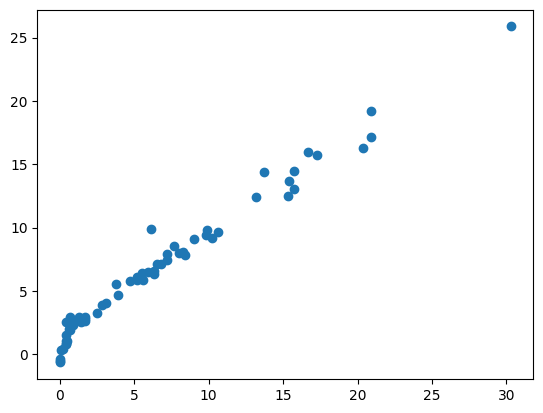

In [87]:
plt.scatter(y_test, y_pred)

### Apply Ridge Regression

In [88]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()

In [89]:
ridge_model.fit(X_train_scaled, y_train)
y_pred = ridge_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Linear Regression Model\nMean Squared Error: {mse}\nR^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')

Linear Regression Model
Mean Squared Error: 0.6949198918152095
R^2 Score: 0.9842993364555512
Mean Absolute Error: 0.5642305340105704


### Apply Elastic Net Regression

In [90]:
from sklearn.linear_model import ElasticNet
elastic_model = ElasticNet()

In [91]:
elastic_model.fit(X_train_scaled, y_train)
y_pred = elastic_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Linear Regression Model\nMean Squared Error: {mse}\nR^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')

Linear Regression Model
Mean Squared Error: 5.517251101025224
R^2 Score: 0.8753460589519703
Mean Absolute Error: 1.8822353634896


## Lasso Cross Validation

In [92]:
from sklearn.linear_model import LassoCV

lasso_cv_model = LassoCV(cv=5)

lasso_cv_model.fit(X_train_scaled, y_train)
y_pred = lasso_cv_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Linear Regression Model\nMean Squared Error: {mse}\nR^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')

Linear Regression Model
Mean Squared Error: 0.7924995554743638
R^2 Score: 0.9820946715928274
Mean Absolute Error: 0.6199701158263436


In [93]:
lasso_cv_model.alpha_

np.float64(0.05725391318234408)

In [94]:
lasso_cv_model.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [95]:
lasso_cv_model.mse_path_.shape

(100, 5)

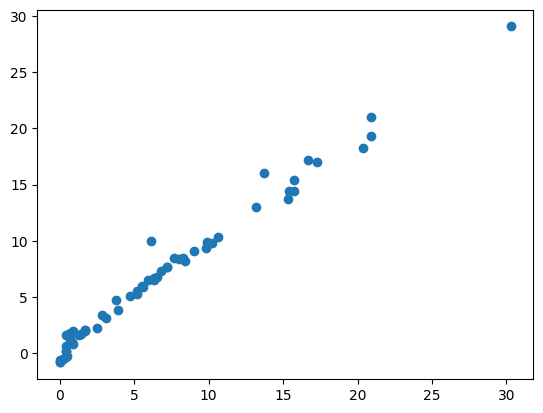

In [96]:
plt.scatter(y_test, y_pred)

### Ridge cross validation

In [97]:
from sklearn.linear_model import RidgeCV
ridge_cv_model = RidgeCV(cv=5)
ridge_cv_model.fit(X_train_scaled, y_train)
y_pred = ridge_cv_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Linear Regression Model\nMean Squared Error: {mse}\nR^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')    

Linear Regression Model
Mean Squared Error: 0.6949198918152095
R^2 Score: 0.9842993364555512
Mean Absolute Error: 0.5642305340105704


In [103]:
import pickle
# Save the model
with open('model/Ridge_linear_regression_model.pkl', 'wb') as f:
    pickle.dump(ridge_cv_model, f)

# Save the scaler
with open('model/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


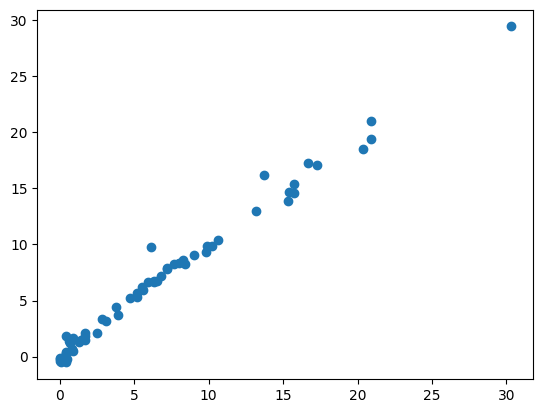

In [98]:
plt.scatter(y_test, y_pred)

In [99]:
from sklearn.linear_model import ElasticNetCV
elastic_cv_model = ElasticNetCV(cv=5)
elastic_cv_model.fit(X_train_scaled, y_train)
y_pred = elastic_cv_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Linear Regression Model\nMean Squared Error: {mse}\nR^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')  

Linear Regression Model
Mean Squared Error: 0.8222830416276261
R^2 Score: 0.9814217587854941
Mean Absolute Error: 0.65759467314309


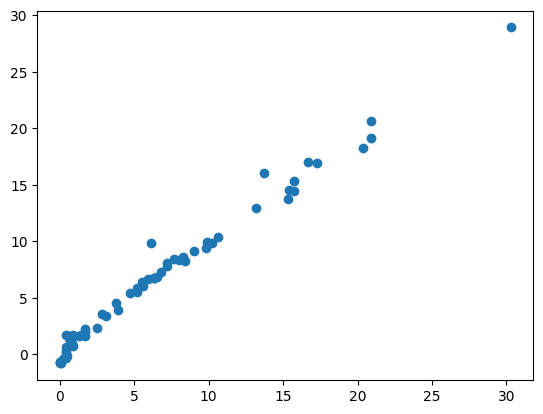

In [100]:
plt.scatter(y_test, y_pred)